In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* [<font size=4>Question 1:What are some of the parameters of Aggolomarative Clustering?</font>](#1)
* [<font size=4>Question 2: Fitting and Visualizing AgglomarativeClustering Algorithm ?</font>](#2)   
* [<font size=4>Question 3: Diffrent linkage options ?</font>](#3)   
* [<font size=4>Question 4: Make Moons</font>](#4)  
* [<font size=4>Question 5: Make Circle</font>](#5)  
* [<font size=4>Question 6: Make Blob</font>](#6)  
* [<font size=4>Question 7: Clustering on Seeds Data</font>](#7)  

# Question 1:What are some of the parameters of Aggolomarative Clustering? <a id="1"></a>

* n_clusters : It is by default 2,  It may not be specified if distance threshold is given
* affinity: What distance metric will be used? Precomputed means square matrix
* linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
* distance_threshold float, default=None

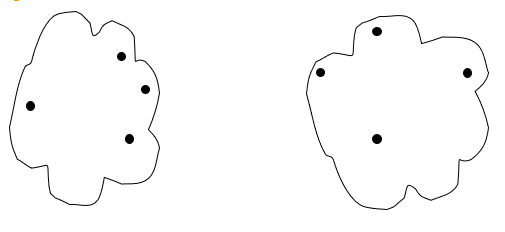

# Question 2:How to fit Agglomarative Clusterig? <a id="2"></a>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


In [ ]:
X = np.array([[1, 2], [1, 3],[2,2] ,[3,3],[1, 0], [4, 1], [4, 4], [4, 0],[6,6]])
plt.scatter(X[:,0],X[:,1])

In [ ]:
model = AgglomerativeClustering(linkage="single")
model = model.fit(X)
model.labels_

In [ ]:
plt.scatter(X[:,0], X[:,1],c=vectorizer(model.labels_))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'ward')
dn = dendrogram(Z)
plt.show()

# Question 3:Different Linkagae? <a id="2"></a>

In [ ]:
def clust_plot(X,noise,c):
    model = AgglomerativeClustering(linkage="single",n_clusters=c)
    model = model.fit(X)
    ymin=model.labels_
    model = AgglomerativeClustering(linkage="complete",n_clusters=c)
    model = model.fit(X)
    ymax=model.labels_
    model = AgglomerativeClustering(linkage="average",n_clusters=c)
    model =model.fit(X)
    yavg=model.labels_
    model = AgglomerativeClustering(linkage="ward",n_clusters=c)
    model = model.fit(X)
    yward=model.labels_
    plt.figure()
    plt.subplot(141)
    plt.gca().set_title('MIN')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(ymin))
    plt.subplot(142)
    plt.gca().set_title('MAX')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(ymax))
    plt.subplot(143)
    plt.gca().set_title('Average')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(yavg))
    plt.subplot(144)
    plt.gca().set_title('Ward')
    plt.scatter(X[:,0], X[:,1],c=vectorizer(yward))

In [ ]:
clust_plot(X,0,2)

# Question 4:What is the Effect on Make Moons ?

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1500, noise=0.05)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

In [ ]:
clust_plot(X,0,2)

# Question 5:What is the effect on circles ?

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

In [ ]:
clust_plot(X,0,2)

# Question 6:What is the effect on blob ?<a id=6></a>

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=8,cluster_std=[1.0, 2.5, 0.5])
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

In [ ]:
clust_plot(X,0,3)

# Question 7: Clustering on seeds data

In [ ]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
import pandas as pd
df=pd.read_csv("/kaggle/input/uciseeds/seeds.csv")
df.head(5)

In [ ]:
X=df.iloc[:,0:7]
y=df.iloc[:,7]

In [ ]:
model = AgglomerativeClustering(linkage="single",n_clusters=3)
model = model.fit(X)
ymin=model.labels_
print(purity_score(y,ymin))
model = AgglomerativeClustering(linkage="complete",n_clusters=3)
model = model.fit(X)
ymax=model.labels_
print(purity_score(y,ymax))
model = AgglomerativeClustering(linkage="average",n_clusters=3)
model =model.fit(X)
yavg=model.labels_
print(purity_score(y,yavg))
model = AgglomerativeClustering(linkage="ward",n_clusters=3)
model = model.fit(X)
yward=model.labels_
print(purity_score(y,yward))

In [ ]:
Z = linkage(X, 'ward')
dn = dendrogram(Z)
plt.show()